In [51]:
#multi class -> a 아니면 나머지 , b 아니면 나머지  , (이진)
#(NB, KNN, DT, Logistic)

#mulitnomial -> a,b,c, 중 한가지를 선택'
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn

#한글을 출력하기 위한 import
#한글 font를 설정해준다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import matplotlib as mpl # -깨짐 현상을 해결하기 위햏 matplotlib을 import
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 현상을 해결하기 위한 구문



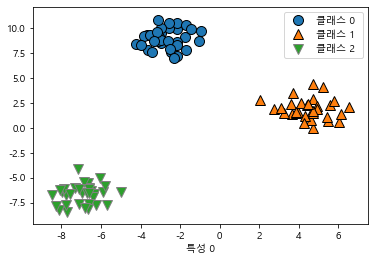

In [46]:

from sklearn.datasets import make_blobs



X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.xlabel("특성 0")
plt.legend(["클래스 0 ","클래스 1", "클래스 2"])

In [47]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X,y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)


계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


게수 배열:
 [[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]


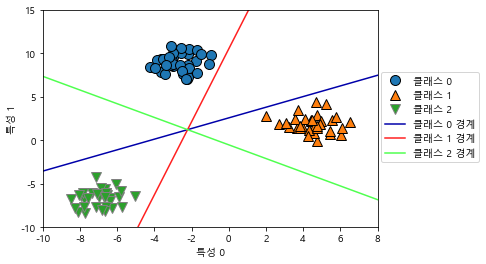

In [48]:
#multinomail

#산점도 그리기 
#mglearn.plots.plot_2d_classification(logr, X, fill =True, alpha = .7)
mglearn.discrete_scatter(X[:,0], X[:,-1],y)

#라인 x축의 거리 설정
line = np.linspace(-15,15)

#for문을 이용해 coef_, intercept_, clolor들을 각각 총 3개 출력
for coef, intercept, color in zip(logr.coef_,logr.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c= color)

#y축 거리 설정
plt.ylim(-10,15)

#x축 거리 설정
plt.xlim(-10,8)

# x, y축 라벨 출력
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#설명 구문 출력
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계',
           '클래스 2 경계'], loc=(1.01, 0.3))

print("게수 배열:\n", logr.coef_)

In [56]:
#혼동행렬(confusion_matrix)

from sklearn.metrics import confusion_matrix

#datasets에서 iris데이터를 가져와 iris_dataset에 저장한다.
iris_dataset = datasets.load_iris()

#훈련, 테스트 데이터 셋으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                   iris_dataset['target'],
                                                    random_state = 0, test_size=0.40)

# logr 객체에 로지스트 모델을 생성해 X,y를 학습시킨다.
logr = LogisticRegression().fit(X,y)

# 훈련 데이터 셋을 학습시킨다.
logr.fit(X_train, y_train)

# 테스트값의 예측값을 y_pred에 저장한다.
y_pred = logr.predict(X_test)

#혼동행렬에 X_test와 X_test의 예측값을 넣는다.
cm = confusion_matrix(y_test, y_pred)

# 혼동해렬값을 출력한다.
print(cm)
#[16  0  0]   16 , 0 , 0 개 예측 성공한거
#[0  22  1]   0  , 22 , 1 개 예측 성공 
#[0  4  17]   0  , 4 , 17 개 예측 성공

print('\n 테스트 세트의 정확도:{:.2f}'.format(logr.score(X_test,y_test)))
print("Number of mislbeled points out of a total %d points : %d",(X_test.shape[0],
                                                                 (y_test != y_pred).sum()))


[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

 테스트 세트의 정확도:0.92
Number of mislbeled points out of a total %d points : %d (60, 5)
proba [2 1 0 2 0]
